In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load data
df = pd.read_csv(r"C:\Users\HARSH\OneDrive\Desktop\Retail_Internship_Project\data\cleaned\customer_features.csv")

# Define target: high spender if above median
median_spend = df["Monetary"].median()
df["HighValue"] = (df["Monetary"] > median_spend).astype(int)

# ✅ Use only non-leaky features
X = df[["Recency", "Frequency", "DistinctItems"]]
y = df["HighValue"]

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[362  67]
 [ 70 369]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       429
           1       0.85      0.84      0.84       439

    accuracy                           0.84       868
   macro avg       0.84      0.84      0.84       868
weighted avg       0.84      0.84      0.84       868



C:\Users\HARSH\AppData\Local\Temp\ipykernel_4704\4140077089.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")


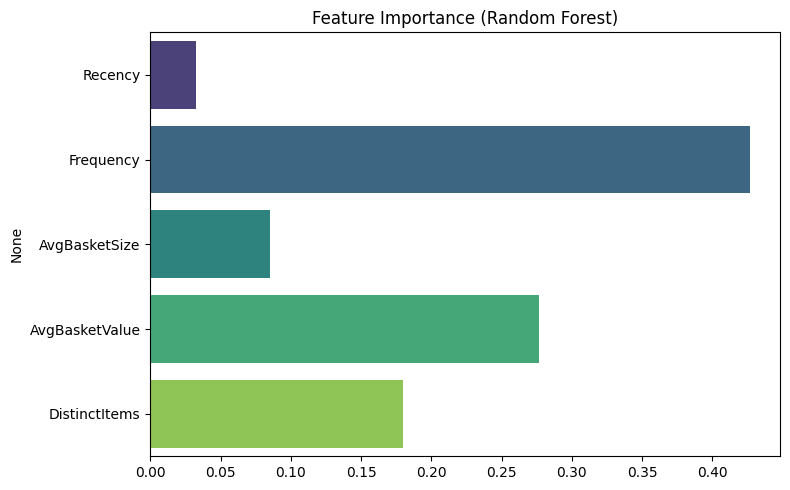

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.savefig(r"C:\Users\HARSH\OneDrive\Desktop\Retail_Internship_Project\reports\figures\feature_importance.png")
plt.show()
